## "t-test" Analysis

### Objectives:

* Explain the notion of hypothesis testing

* Explain the purpose of t-test

* Explain how to use the _p_-value to determine significance

* Explain when to reject the null hypothesis, and what that rejection implies

* Use scipy to run a t-test against two samples

### Notes on t-test:

- t-test (independent) is a statistical method to test a hypothesis about the difference between two populations (or between two treatments). Example, comparison between men and women.

-  Student's t-test is also used for determining if two sample means represent the same population.



- Null Hypothesis: There is no difference.

- Alternative Hypothesis: There is a difference.


- At the conculsion of the hypothesis test, we will decide either to:

    a. Reject $H_0$: Conclude that the data indicate a significant difference between the two groups, OR
    
    b. Fail to reject $H_0$: The data does not provide sufficient evidence to conclude that the difference exists.
    
    
### How to interpret p-values:

- P-value is the calculated probability of finding the observed results, assuming the null hypothesis is true.

- P > 0.10: No evidence against the null hypothesis. The data appear to be consistent with the null hypothesis.

- 0.01 < P < 0.05: Moderate evidence against the null hypothesis in favor of the alternative.

- P < 0.001: Very strong evidence against the null hypothesis in favor of the alternative.

In [1]:
import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import time
from datetime import datetime
from scipy import stats

In [2]:
sentiment_stock_data = pd.read_csv("oil_sentiments_vs_prices.csv")
sentiment_stock_data = sentiment_stock_data[['Date', 'Media Sources', 'Tweet Polarity', 'Ticker', 'Price']]
sentiment_stock_data.head()

,Date,Media Sources,Tweet Polarity,Ticker,Price
0,2018-01-03,@MarathonPetroCo,0.23845,MPC,68.61
1,2018-01-04,@DevonEnergy,-0.09200,DVN,43.23
2,2018-01-04,@MarathonPetroCo,0.21230,MPC,68.68
3,2018-01-04,@OPECnews,0.49390,USO,12.37
4,2018-01-05,@DevonEnergy,-0.27870,DVN,43.11


### Performing 't-test'

In [3]:
stat_t_test = []

for x in sentiment_stock_data["Media Sources"].unique():
    df = sentiment_stock_data[sentiment_stock_data['Media Sources'] == x]
    s1 = df['Tweet Polarity']
    s2 = df['Price']
    (t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
    stat_t_test.append({'p-value': p,
                        't-stats': t_stat,
                        'Oil Company': x})

stat_final_df = pd.DataFrame(stat_t_test)
stat_final_df

,Oil Company,p-value,t-stats
0,@MarathonPetroCo,1.320928e-13,-178.113946
1,@DevonEnergy,3.153527e-19,-158.706086
2,@OPECnews,2.089671e-16,-101.777974
3,@OXY_Petroleum,7.572373e-10,-275.305442
4,@ValeroEnergy,2.397432e-10,-170.817825
5,@Phillips66Co,2.964335e-09,-170.445909
6,@conocophillips,1.292795e-04,-83.504799


### Coverting exponential to decimal p-values and concluding t-test result.

In [5]:
stat_final_df['P-Value_Decimal'] = stat_final_df['p-value'].apply(lambda x: '%.17f' % x).values.tolist()

for x in stat_final_df['P-Value_Decimal']:
    if float(x) < 0.001:
        stat_final_df['Conclusion'] = "Very strong evidence against the null hypothesis!!"
    else:
        stat_final_df['Conclusion'] = "Moderate/No evidence against the null hypothesis!!"
stat_final_df

,Oil Company,p-value,t-stats,P-Value_Decimal,Conclusion
0,@MarathonPetroCo,1.320928e-13,-178.113946,0.00000000000013209,Very strong evidence against the null hypothes...
1,@DevonEnergy,3.153527e-19,-158.706086,0.00000000000000000,Very strong evidence against the null hypothes...
2,@OPECnews,2.089671e-16,-101.777974,0.00000000000000021,Very strong evidence against the null hypothes...
3,@OXY_Petroleum,7.572373e-10,-275.305442,0.00000000075723731,Very strong evidence against the null hypothes...
4,@ValeroEnergy,2.397432e-10,-170.817825,0.00000000023974325,Very strong evidence against the null hypothes...
5,@Phillips66Co,2.964335e-09,-170.445909,0.00000000296433519,Very strong evidence against the null hypothes...
6,@conocophillips,1.292795e-04,-83.504799,0.00012927953930928,Very strong evidence against the null hypothes...


### Plot sample means (Tweet Polarity & Stock Price) with error bars:

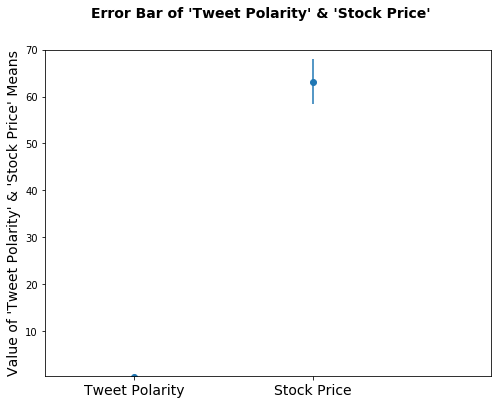

In [17]:
tick_labels = ["Tweet Polarity", "Stock Price"]

means = [sentiment_stock_data['Tweet Polarity'].mean(), sentiment_stock_data['Price'].mean()]
x_axis = np.arange(0, len(means))

sem = [sentiment_stock_data['Tweet Polarity'].sem(), sentiment_stock_data['Price'].sem()]

# Plot
fig, ax = plt.subplots(figsize = (8,6))

fig.suptitle("Error Bar of 'Tweet Polarity' & 'Stock Price'",
             fontsize=14, fontweight="bold")

ax.errorbar(x_axis, means, yerr=sem, fmt="o")

ax.set_xlim(-0.5, 2.0)
ax.set_ylim(0.5, 70)

ax.set_xticklabels(tick_labels, fontsize = 14)
ax.set_xticks([0, 1])

ax.set_ylabel("Value of 'Tweet Polarity' & 'Stock Price' Means", fontsize = 14)

plt.show()